<a href="https://colab.research.google.com/github/onlygoodman/python/blob/good/titanic_0526.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic survived
타이타닉 생존자 예측모델링

# 데이터 분석 및 전처리

In [3]:
import pandas as pd #데이터 프레임 자료 처리를 위한 impot
import numpy as np #array계산 및 ML동작을 위한 import
import seaborn as sns #히트맵 등 plot을 위한 import

import math #차후 factorial 계산 등 수학적인 계산을 위한 import

from sklearn.model_selection import train_test_split #한정된 트레이닝 데이터를 훈련//검증 데이터로 나누기 위한 import
from sklearn.preprocessing import PolynomialFeatures #특성공학을 사용하기 위한 import
from sklearn.preprocessing import StandardScaler #전처리된 데이터들의 scale을 맞춰주기 위한 import

from sklearn.neighbors import KNeighborsClassifier #KNN 분류
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn.linear_model import LogisticRegression #Logistic회귀

from sklearn.decomposition import PCA #차원 축소 - 주성분의 개수에 따른 최적화 모델 구현을 위한 import
from sklearn.metrics import accuracy_score #이후 test.csv 파일의 predict 자료의 score을 매기기 위한 import




train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/test.csv')

In [4]:
#학습 해야 할 데이터의 특성들과 구조 파악을 위한 info확인
train_df.info()
train_df
#PassengerId, Ticket열은 고유번호이므로 삭제하고 Cabin은 결측값이 너무 많기 때문에 삭제하여 데이터를 사용해야겠다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train_df.drop(['PassengerId','Ticket', 'Cabin'], axis=1, inplace =True)

In [6]:
train1 = train_df[train_df["Age"].notnull()]
train2 = train1[train1["Embarked"].notnull()]

#나이와 승선지의 결측치를 예측하기 어렵기 때문에 결측치가 없는 열만 추출 train2, test2에 저장

In [7]:
#train2 데이터 전반적인 구조 확인
train2.describe() 

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [8]:
import matplotlib.pyplot as plt

# 자료분석

1. 모든 데이터에 대해 생존 여부와의 관계를 1:1 대응시켜 살펴본다.
 - pcl to sur
 - sex to sur
 - sib to sur
 - par to sur
 - emb to sur
 - far to sur
 - age to sur

In [9]:
#train2 데이터에서 등급별 생존확률에 대한 내림차순 정렬
pcl_to_sur = train2[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train2[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.652174
1,2,0.479769
2,3,0.239437


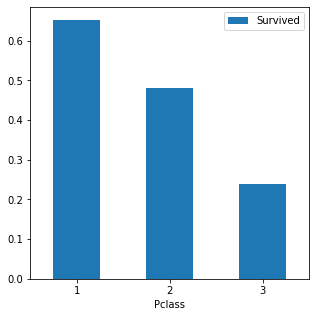

In [10]:
#등급과 생존률 간의 상관관계 시각화
pcl_to_sur.plot(kind="bar", x='Pclass', y='Survived', figsize=(5,5), rot=0)

In [11]:
#train2 데이터에서 sex별 생존확률에 대한 내림차순 정렬
sex_to_sur = train2[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train2[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.752896
1,male,0.205298


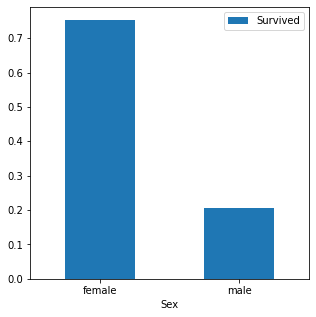

In [12]:
#sex와 생존률 간의 상관관계 시각화
sex_to_sur.plot(kind="bar", x='Sex', y='Survived', figsize=(5,5), rot=0)

In [13]:
#train2 데이터에서 같이 배에 탄 형제자매-배우자 수 별 생존확률에 대한 내림차순 정렬
sib_to_sur = train2[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train2[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.530055
2,2,0.440000
0,0,0.368870
3,3,0.333333
4,4,0.166667
5,5,0.000000


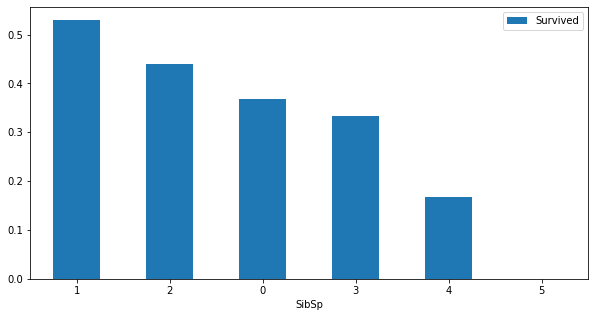

In [14]:
#SibSp와 생존률 간의 상관관계 시각화
sib_to_sur.plot(kind="bar", x='SibSp', y='Survived', figsize=(10,5), rot=0)

In [15]:
#train2 데이터에서 부모자식 수 별 생존확률에 대한 내림차순 정렬
par_to_sur = train2[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train2[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
2,2,0.573529
1,1,0.554545
0,0,0.354528
5,5,0.200000
4,4,0.000000
6,6,0.000000


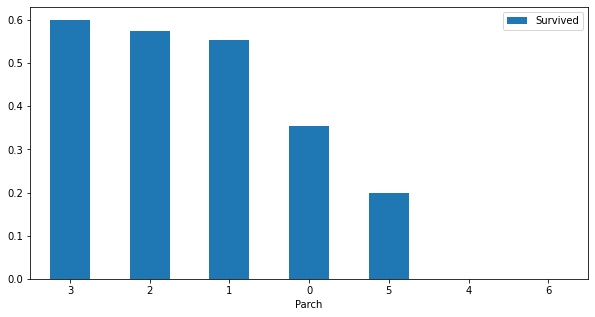

In [16]:
#Parch와 생존률 간의 상관관계 시각화
par_to_sur.plot(kind="bar", x='Parch', y='Survived', figsize=(10,5), rot=0)

In [17]:
#train2 승선지 별 생존확률에 대한 내림차순 정렬
emb_to_sur = train2[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train2[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.607692
2,S,0.362816
1,Q,0.285714


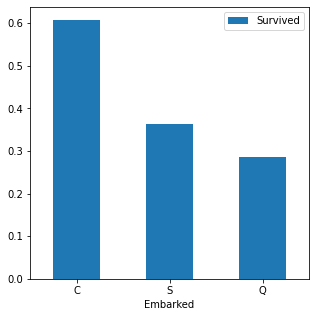

In [18]:
#Embarked와 생존률 간의 상관관계 시각화
emb_to_sur.plot(kind="bar", x='Embarked', y='Survived', figsize=(5,5), rot=0)

In [19]:
#생존한 사람 별 낸 요금의 평균 내림차순 정렬
far_to_sur = train2[train2['Fare']>0][['Fare', 'Survived']].groupby(['Survived'], as_index=False).mean().sort_values(by='Survived', ascending=False)
far_to_sur

,Survived,Fare
1,1,51.827629
0,0,23.295104


,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


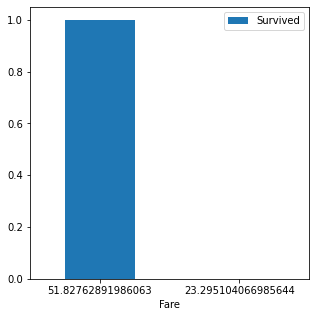

In [20]:
#Fare와 생존률 간의 상관관계 시각화
far_to_sur.plot(kind="bar", x='Fare', y='Survived', figsize=(5,5), rot=0)
train2.describe()

#요금은 요금 구간별

In [21]:
#train2 나이 별 생존확률에 대한 내림차순 정렬
age_to_sur = train2[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train2[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


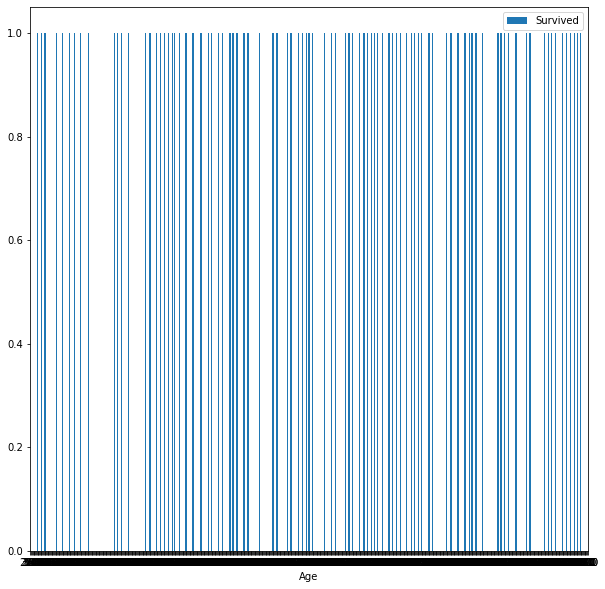

In [22]:
#Age와 생존률 간의 상관관계 시각화
train2.plot(kind="bar", x='Age', y='Survived', figsize=(10,10), rot=0)


각 특성 별 생존여부와의 1:1 대응관계 분석
 - pcl to sur

    등급이 높을 수록 생존확률이 비례해서 올라갔다.



 - sex to sur

    여성이 남성보다 생존확률이 높았다.

    **등급-성별에 대한 생존확률을 한번 점검해보아야겠다.**



 - sib to sur

    같이 동승한 지인의 수가 1 2 0 3 4 5 순으로 낮아졌다.

    동승한 지인의 수가 많아질수록 생존확률이 낮아지는것이 관측되었다.

    특이하게 1,2 가 0보다 생존확률이 높았고 5는 생존확률이 0이다.



 - par to sur
  
    같이 배에탄 부모 자식 수는 3 2 1 0 5 4 6 순으로 낮아졌다.

    동승자가 너무 많아지면 생존확률은 0에 수렴했다.

    **sib to sur과 par to sur은 동승자수 별 비율을 좀 확인해봐야겠다.**



 - emb to sur

    승선지 별 생존확률이 신기하게 C-S-Q순으로 차이가 났다.
    
    **C-S-Q 와 등급(Pclass)을 엮어서 한번 생존확률을 확인해봐야겠다.**

    **더 심화로 요금, 승선지, 등급을 엮어도 좋아보인다.**


 - far to sur

    **요금 구간 별 생존확률로 다시 분석을 해보아야겠다.**

#자료간 상관관계 - 히트맵으로 시각화

In [23]:
#히트맵 작성을 위한 트레인데이터 자료간 상관관계
train2.corr().abs()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,0.356462,0.082446,0.015523,0.095265,0.266100
Pclass,0.356462,1.000000,0.365902,0.065187,0.023666,0.552893
Age,0.082446,0.365902,1.000000,0.307351,0.187896,0.093143
SibSp,0.015523,0.065187,0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,0.187896,0.383338,1.000000,0.206624
Fare,0.266100,0.552893,0.093143,0.139860,0.206624,1.000000


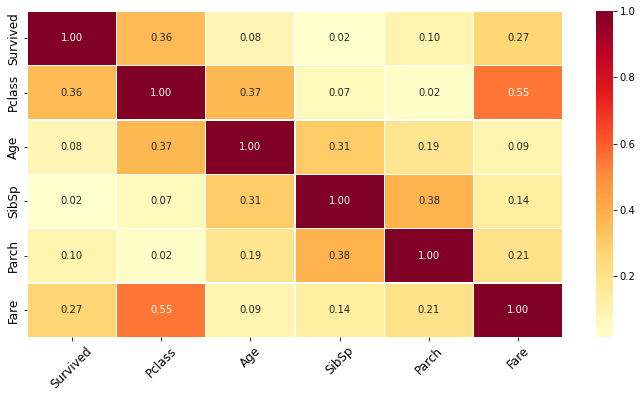

In [24]:
#각 특성 별 상관관계

fig, ax = plt.subplots(figsize=(12,6))

sns.heatmap(train2.corr().abs(), # 위에서 전처리한 데이터프레임
            annot = True, # 숫자 표시 여부
            ax = ax, # 히트맵을 그릴 격자
            linewidths = 0.4, # 선의 굵기
            linecolor = 'white', # 선의 색깔
            fmt = '.2f', # 소수점 포맷팅 형태
            cmap = 'YlOrRd') # colormap 형태

plt.xticks(rotation=45, size = 12)
plt.yticks(size=12) 
plt.show()

Pclass와 Fare은 반비례관계로 0.6값을 지니며 가장 선형적으로 보인다.

Pclass-survived 0.4
sibsp-parch 0.4
Fare Survived 0.3

성별을 0과 1로 나누어 생존간의 상관관계까지 보고싶다.

*** 각각의 데이터를 상관관계 분석에서 시각적으로 보인 바의 크기대로 점수를 부여하였다. ***

#자료 분석을 기반으로한 자료 치환과정

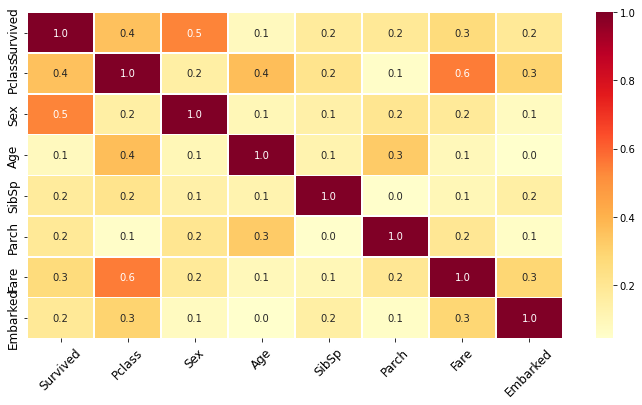

In [27]:
#자료 전처리과정
train3 = train2.replace(['male','female'],[10,20])
train3 = train3.replace(['C', 'S', 'Q'],[30,20,10])
train3['SibSp'] = train3['SibSp'].replace([1,2,0,3,4,5],[60,50,40,30,20,10])
train3['Parch'] = train3['Parch'].replace([3,2,1,0,5,4,6],[70,60,50,40,30,20,10])
train3['Pclass'] = train3['Pclass'].replace([1,2,3],[90,60,30])

In [28]:
#전처리한 데이터를 사용할 항목별로 쪼개서 준비

#sur_train_input -> train.csv에서 전처리한 데이터-> input,target준비
sur_train_input = train3[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].to_numpy()
sur_train_target = train3[['Survived']].to_numpy()

#전처리한 데이터들을 array형식으로 바꾸고 검증을 위해 sur_train 데이터들을 train과 val(test)데이터로 나눔
train_input, test_input, train_target, test_target = train_test_split(sur_train_input, sur_train_target, random_state=42)

#target 형식을 재조정해줌
train_target = train_target.reshape(-1)
train_target.shape

test_target = test_target.reshape(-1)
test_target.shape

(178,)

In [29]:
#모델 검증을 위한 test.csv파일 데이터 전처리과정
test_df_f = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/test.csv')
test_df_f.drop(['PassengerId','Ticket', 'Cabin'], axis=1, inplace =True)

test_df_f = test_df_f.replace(['male','female'],[10,20])
test_df_f = test_df_f.replace(['C','S','Q'],[30,20,10])
test_df_f['Pclass']= test_df_f['Pclass'].replace([1,2,3],[9,6,3])
test_df_f['SibSp'] = test_df_f['SibSp'].replace([1,2,0,3,4,5],[60,50,40,30,20,10])
test_df_f['Parch'] = test_df_f['Parch'].replace([3,2,1,0,5,4,6],[70,60,50,40,30,20,10])
test_df_f['Age'] = test_df_f['Age'].fillna(test_df_f.groupby('Pclass')['Age'].transform('mean'))
test_df_f['Fare'] = test_df_f['Age'].fillna(method = 'ffill')

test_target_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/gender_submission.csv')
sur_test_input = test_df_f[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].to_numpy()
sur_test_target = test_target_df[['Survived']].to_numpy()

sur_test_input.shape
sur_test_target = sur_test_target.reshape(-1)

#전처리 데이터를 활용한 간단한 머신러닝모델 구현

train3 데이터로 로지스틱 회귀모델 학습 후 test3에 대한 점수 출력

In [30]:
lr = LogisticRegression()
lr.fit(train_input, train_target)
lr.score(sur_train_input, sur_train_target)
log_predict = lr.predict(sur_test_input)
lr_score = lr.score(test_input, test_target)

print("lr-모델 훈련데이터 점수 :",lr.score(train_input, train_target))
print("lr-모델 검증데이터 점수:",lr_score)

랜덤포레스트로 모델링

In [33]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(train_input, train_target)

print("rf-모델 검증데이터 점수:",rf.score(test_input, test_target))

0.7865168539325843

#특성공학을 활용한 특성추가

특성 간 상관관계 분석이 가능한 지식이 아직 부족한 상태(선형대수,통계학..등)

따라서 특성공학을 통해 차원에 따른 특성개수를 늘려 학습해보기로 하였다.

특성 공학으로 특성 늘린 후 랜덤포레스트로 모델링

In [34]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

rf_poly = RandomForestClassifier(n_jobs=-1)
rf_poly.fit(train_poly, train_target)
rf_poly_score = rf_poly.score(test_poly, test_target)
print("rf-모델 poly 검증데이터 점수:",rf_poly_score)

0.7865168539325843

#특성 공학으로 특성 늘린 후 정규화 작업 진행, KNN, RF...으로 모델링

특성을 단순히 늘려보았더니 점수가 오히려 떨어짐을 관찰하였고

차원을 증가시킬수록 훈련 데이터에 과적합만 발생 할 것 같아 다른 시도를 하였다.

자료간 스케일이 맞지 않다고 생각하여 자료의 스케일을 맞춰주기위해 정규화 작업을 진행하였다.

RF로 모델링

In [35]:
ss= StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

rf_scaled = RandomForestClassifier(n_jobs=-1)
rf_scaled.fit(train_scaled, train_target)
rf_scaled.score(test_scaled, test_target)
print("rf-모델 poly-scaled-검증데이터 점수:",rf_scaled.score(test_scaled, test_target))

0.8033707865168539

KNN으로 모델링

In [36]:
kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)
print("kn-모델 poly-score-검증데이터 점수:",kn.score(test_scaled, test_target))

0.7865168539325843

# 주성분 분석으로 과대적합을 막고 최적의 요소 찾아서 모델링

특성을 늘리고 정규화까지 진행하였지만 뚜렷한 모델점수 개선이 되지 않았다.

따라서 이를 해결하기위해 PCA를 통해 특성을 줄여 학습해보았다.

In [37]:
#자료의 특성을 50퍼센트 가량 담을 수 있게 componets값을 정해보았다.
pca = PCA(n_components = 0.5)
pca.fit(train_input)
train_pca = pca.transform(train_input)
test_pca = pca.transform(test_input)
rf.fit(train_pca, train_target)
rf.score(test_pca, test_target)
print("rf-모델 poly-scaled-pca-검증데이터 점수:",rf.score(test_pca, test_target))

In [39]:
pca = PCA(n_components = 20)
pca.fit(train_poly)
train_pca = pca.transform(train_poly)
test_pca = pca.transform(test_poly)

rf.fit(train_pca, train_target)
rf.score(test_pca, test_target)
#주성분을 20개 사용
print("rf-모델 poly-scaled-pca-검증데이터 점수:",rf.score(test_pca, test_target))

0.7415730337078652

특성의 개수를 더 늘려서 다양한 모델에 적용

In [40]:
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

pca = PCA(n_components = 50)
pca.fit(train_poly)
train_pca = pca.transform(train_poly)
test_pca = pca.transform(test_poly)

rf.fit(train_pca, train_target)
rf.score(test_pca, test_target)
round(rf.score(test_pca, test_target), 4)*100

76.4

In [41]:
kn.fit(train_pca, train_target)
kn.score(test_pca, test_target)


0.7303370786516854

#미완성 셀 

In [ ]:
# import math

# scoreboard = {}

# for deg in range(2,6+1):
#   poly = PolynomialFeatures(degree=deg)
#   poly.fit(train_input)
#   train_poly = poly.transform(train_input)
#   test_poly = poly.transform(test_input)

#   x = math.factorial(7+deg)/(math.factorial(7)*math.factorial(deg))
  

#   for com in range(3, int(x)):
#     pca = PCA(n_components = com)
#     pca.fit(train_poly)
#     train_pca = pca.transform(train_poly)
#     test_pca = pca.transform(test_poly)

#     rf.fit(train_pca, train_target)
#     rf.score(test_pca, test_target)

#     scoreboard["rf - deg = {}, com = {}".format(deg, com)] = round(rf.score(test_pca, test_target), 4)*100

# len(scoreboard)
# list(scoreboard.values())
# print(max(list(scoreboard.values())))
# print(list(scoreboard.values()).index(max(list(scoreboard.values()))))

# max_key=list(scoreboard.keys())[list(scoreboard.values()).index(max(list(scoreboard.values())))]
# print(list(scoreboard.keys())[list(scoreboard.values()).index(max(list(scoreboard.values())))])
# print(scoreboard[max_key])

#for문을 통한 최적의 degree 및 components 개수 찾기

In [ ]:
scoreboard_lr = {}
scoreboard_rf = {}
scoreboard_kn = {}

kn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=500, n_jobs=-1)
rf = RandomForestClassifier(n_jobs=-1)


for deg in range(2,4+1):
  poly = PolynomialFeatures(degree=deg)
  poly.fit(train_input)
  train_poly = poly.transform(train_input)
  test_poly = poly.transform(test_input)

  ss.fit(train_poly)
  train_scaled = ss.transform(train_poly)
  test_scaled = ss.transform(test_poly)

  x = math.factorial(7+deg)/(math.factorial(7)*math.factorial(deg))
  

  for com in range(3, int(x)):
    pca = PCA(n_components = com)
    pca.fit(train_scaled)
    train_pca = pca.transform(train_scaled)
    test_pca = pca.transform(test_scaled)

    lr.fit(train_pca, train_target)
    rf.fit(train_pca, train_target)
    kn.fit(train_pca, train_target)
    
    scoreboard_lr["lr - deg = {}, com = {}".format(deg, com)] = round(lr.score(test_pca, test_target), 3)*100
    scoreboard_rf["rf - deg = {}, com = {}".format(deg, com)] = round(rf.score(test_pca, test_target), 3)*100
    scoreboard_kn["kn - deg = {}, com = {}".format(deg, com)] = round(kn.score(test_pca, test_target), 3)*100

max_value = max(list(scoreboard_lr.values()))
mvalue_index = list(scoreboard_lr.values()).index(max_value)
max_key=list(scoreboard_lr.keys())[mvalue_index]

print("lr 모델의 최적의 조합 :", list(scoreboard_lr.keys())[mvalue_index])
print("최고점수 : ", scoreboard_lr[max_key])

max_value = max(list(scoreboard_rf.values()))
mvalue_index = list(scoreboard_rf.values()).index(max_value)
max_key=list(scoreboard_rf.keys())[mvalue_index]

print("rf 모델의 최적의 조합 :", list(scoreboard_rf.keys())[mvalue_index])
print("최고점수 : ", scoreboard_rf[max_key])

max_value = max(list(scoreboard_kn.values()))
mvalue_index = list(scoreboard_kn.values()).index(max_value)
max_key=list(scoreboard_kn.keys())[mvalue_index]

print("kn 모델의 최적의 조합 :", list(scoreboard_kn.keys())[mvalue_index])
print("최고점수 : ", scoreboard_kn[max_key])

#각각의 ML모델의 파라미터값 조정

max_iter값이 충분하지않아 100에서 500으로 조정

In [ ]:
lr = LogisticRegression(max_iter=500, n_jobs=-1)

poly = PolynomialFeatures(degree=3)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_real_poly = poly.transform(sur_test_input)

ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_real_scaled = ss.transform(test_real_poly)

pca = PCA(n_components = 36)
pca.fit(train_scaled)
train_pca = pca.transform(train_scaled)
test_real_pca = pca.transform(test_real_scaled)

lr.fit(train_pca, train_target)
predict = lr.predict(test_real_pca)
accuracy = accuracy_score(predict, sur_test_target)


predict = lr.predict(test_real_pca)
accuracy = accuracy_score(predict, sur_test_target)
test_real_poly = poly.transform(sur_test_input)
test_real_scaled = ss.transform(test_real_poly)
test_real_pca = pca.transform(test_real_scaled)
accuracy

#accuracy 최대값 도출

In [ ]:
import math

scoreboard_lr = {}
scoreboard_rf = {}
scoreboard_kn = {}

kn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=500, n_jobs=-1)
rf = RandomForestClassifier(n_jobs=-1)


for deg in range(2,4+1):
  poly = PolynomialFeatures(degree=deg)
  poly.fit(train_input)
  train_poly = poly.transform(train_input)
  test_poly = poly.transform(test_input)
  test_real_poly = poly.transform(sur_test_input)

  ss.fit(train_poly)
  train_scaled = ss.transform(train_poly)
  test_scaled = ss.transform(test_poly)
  test_real_scaled = ss.transform(test_real_poly)

  x = math.factorial(7+deg)/(math.factorial(7)*math.factorial(deg))
  

  for com in range(3, int(x)):
    pca = PCA(n_components = com)
    pca.fit(train_scaled)
    train_pca = pca.transform(train_scaled)
    test_pca = pca.transform(test_scaled)
    test_real_pca = pca.transform(test_real_scaled)

    lr.fit(train_pca, train_target)
    rf.fit(train_pca, train_target)
    kn.fit(train_pca, train_target)
    
    scoreboard_lr["lr - deg = {}, com = {}".format(deg, com)] = round(accuracy_score(lr.predict(test_real_pca), sur_test_target), 4)*100
    scoreboard_rf["rf - deg = {}, com = {}".format(deg, com)] = round(accuracy_score(rf.predict(test_real_pca), sur_test_target), 4)*100
    scoreboard_kn["kn - deg = {}, com = {}".format(deg, com)] = round(accuracy_score(kn.predict(test_real_pca), sur_test_target), 4)*100

max_value = max(list(scoreboard_lr.values()))
mvalue_index = list(scoreboard_lr.values()).index(max_value)
max_key=list(scoreboard_lr.keys())[mvalue_index]

print("lr 모델의 최적의 조합 :", list(scoreboard_lr.keys())[mvalue_index])
print("최고점수 : ", scoreboard_lr[max_key])

max_value = max(list(scoreboard_rf.values()))
mvalue_index = list(scoreboard_rf.values()).index(max_value)
max_key=list(scoreboard_rf.keys())[mvalue_index]

print("rf 모델의 최적의 조합 :", list(scoreboard_rf.keys())[mvalue_index])
print("최고점수 : ", scoreboard_rf[max_key])

max_value = max(list(scoreboard_kn.values()))
mvalue_index = list(scoreboard_kn.values()).index(max_value)
max_key=list(scoreboard_kn.keys())[mvalue_index]

print("kn 모델의 최적의 조합 :", list(scoreboard_kn.keys())[mvalue_index])
print("최고점수 : ", scoreboard_kn[max_key])